In [7]:
url = "https://query1.finance.yahoo.com/v8/finance/chart/TSMC34.SA?symbol=TSMC34.SA&period1=1718394914&period2=1718654114&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=t5QZMhgytYZ&corsDomain=finance.yahoo.com"

In [2]:
import json
import datetime
import requests
import pandas as pd
import numpy as np

In [13]:
js = requests.get(url, headers = {'User-agent': 'your bot 0.1'})
js

<Response [200]>

In [22]:
js.status_code

200

In [21]:
dir(js)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [14]:
js.json()

{'chart': {'result': [{'meta': {'currency': 'BRL',
     'symbol': 'TSMC34.SA',
     'exchangeName': 'SAO',
     'fullExchangeName': 'São Paulo',
     'instrumentType': 'EQUITY',
     'firstTradeDate': 1572008400,
     'regularMarketTime': 1718653875,
     'hasPrePostMarketData': False,
     'gmtoffset': -10800,
     'timezone': 'BRT',
     'exchangeTimezoneName': 'America/Sao_Paulo',
     'regularMarketPrice': 120.64,
     'fiftyTwoWeekHigh': 121.36,
     'fiftyTwoWeekLow': 117.53,
     'regularMarketDayHigh': 121.36,
     'regularMarketDayLow': 117.53,
     'regularMarketVolume': 67030,
     'chartPreviousClose': 115.37,
     'previousClose': 115.37,
     'scale': 3,
     'priceHint': 2,
     'currentTradingPeriod': {'pre': {'timezone': 'BRT',
       'start': 1718628300,
       'end': 1718629200,
       'gmtoffset': -10800},
      'regular': {'timezone': 'BRT',
       'start': 1718629200,
       'end': 1718654400,
       'gmtoffset': -10800},
      'post': {'timezone': 'BRT',
       '

In [24]:
data = js.json()['chart']

In [25]:
data.keys()

dict_keys(['result', 'error'])

In [26]:
data['error']

In [33]:
res, = data['result']

In [34]:
res.keys()

dict_keys(['meta', 'timestamp', 'indicators'])

In [41]:
res['meta']

{'currency': 'BRL',
 'symbol': 'TSMC34.SA',
 'exchangeName': 'SAO',
 'fullExchangeName': 'São Paulo',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 1572008400,
 'regularMarketTime': 1718653875,
 'hasPrePostMarketData': False,
 'gmtoffset': -10800,
 'timezone': 'BRT',
 'exchangeTimezoneName': 'America/Sao_Paulo',
 'regularMarketPrice': 120.64,
 'fiftyTwoWeekHigh': 121.36,
 'fiftyTwoWeekLow': 117.53,
 'regularMarketDayHigh': 121.36,
 'regularMarketDayLow': 117.53,
 'regularMarketVolume': 67030,
 'chartPreviousClose': 115.37,
 'previousClose': 115.37,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'BRT',
   'start': 1718628300,
   'end': 1718629200,
   'gmtoffset': -10800},
  'regular': {'timezone': 'BRT',
   'start': 1718629200,
   'end': 1718654400,
   'gmtoffset': -10800},
  'post': {'timezone': 'BRT',
   'start': 1718654400,
   'end': 1718658000,
   'gmtoffset': -10800}},
 'tradingPeriods': {'pre': [[{'timezone': 'BRT',
     'start': 1718369100,
     'en

In [52]:
df = pd.DataFrame({**res['indicators']['quote'][0], 
                   **dict(date=pd.to_datetime(res['timestamp'], unit='s'))}).dropna().set_index('date', drop=False)
df.index.name = res['meta']['symbol']
df

,low,volume,open,high,close,date
TSMC34.SA,,,,,,
2024-06-14 20:10:00,115.370000,0.0,115.370000,115.370000,115.370000,2024-06-14 20:10:00
2024-06-17 13:02:00,120.070000,0.0,120.070000,121.000000,120.639999,2024-06-17 13:02:00
2024-06-17 13:04:00,120.550003,200.0,120.550003,120.550003,120.550003,2024-06-17 13:04:00
2024-06-17 13:06:00,120.540001,202.0,120.599998,120.599998,120.540001,2024-06-17 13:06:00
2024-06-17 13:07:00,120.519997,599.0,120.519997,120.519997,120.519997,2024-06-17 13:07:00
...,...,...,...,...,...,...
2024-06-17 19:46:00,120.620003,64.0,120.660004,120.739998,120.739998,2024-06-17 19:46:00
2024-06-17 19:47:00,120.680000,213.0,120.750000,120.750000,120.680000,2024-06-17 19:47:00
2024-06-17 19:48:00,120.750000,0.0,120.750000,120.750000,120.750000,2024-06-17 19:48:00


<Axes: xlabel='TSMC34.SA'>

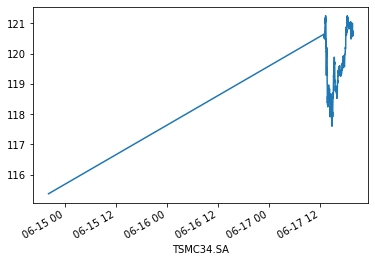

In [53]:
df['close'].plot()